In [14]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn

In [15]:
data_partitions_dirpath = 'data'
print('Available dataset partitions: ', os.listdir(data_partitions_dirpath))

Available dataset partitions:  ['dev', 'download.sh', 'test', 'train']


In [16]:
def read_all_shards(partition='dev', data_dir=data_partitions_dirpath):
    shards = []
    for fn in os.listdir(os.path.join(data_dir, partition)):
        with open(os.path.join(data_dir, partition, fn)) as f:
            shards.append(pd.read_csv(f, index_col=None))
    return pd.concat(shards)

test = read_all_shards('test')
dev = read_all_shards('dev')
train = read_all_shards('train')

partitions = {'test': test, 'dev': dev, 'train': train}
for name, df in partitions.items():
    print('Dataset partition "%s" has %d sequences' % (name, len(df)))

Dataset partition "test" has 126171 sequences
Dataset partition "dev" has 126171 sequences
Dataset partition "train" has 1086741 sequences


In [17]:
dev.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,zf-Tim10_DDP,N1QB11_PSEFD/15-76,PF02953.15,..RMEKKQMKDFMNMYSNLVQRCFNDCV...........TD.F......,RMEKKQMKDFMNMYSNLVQRCFNDCVTDFTSKSLQSKEEGCVMRCV...
1,DNA_primase_S,A8XA78_CAEBR/105-345,PF01896.19,FDID..LTDYDNIRNCCKEATVCPKCWKFMVLAVKILDFLLDDMFG...,FDIDLTDYDNIRNCCKEATVCPKCWKFMVLAVKILDFLLDDMFGFN...
2,Col_cuticle_N,A8XBM5_CAEBR/9-56,PF01484.17,ASAAILSGATIVGCLFFAAQIFNEVNSLYDDVMVDMDAFKVKSNIA...,ASAAILSGATIVGCLFFAAQIFNEVNSLYDDVMVDMDAFKVKSNIAWD
3,GST_C_3,W4XBU3_STRPU/120-207,PF14497.6,KD.................................KLKESLPKTVN...,KDKLKESLPKTVNPILLKFLEKALEDNPNGNGYFVGQDATMVEFVY...
4,Ada_Zn_binding,E8U5K2_DEIML/9-73,PF02805.16,DRWQAVVQRE...AAQ.DG...LFLYAVRTTGIYCRPSCPSRRPR....,DRWQAVVQREAAQDGLFLYAVRTTGIYCRPSCPSRRPRRENVTFFE...


In [18]:
dev.groupby('family_id').size().sort_values(ascending=False).head(10)

family_id
Methyltransf_25    454
LRR_1              240
Acetyltransf_7     219
His_kinase         192
Bac_transf         190
Lum_binding        187
DNA_binding_1      168
Chromate_transp    157
Lipase_GDSL_2      156
DnaJ_CXXCXGXG      151
dtype: int64

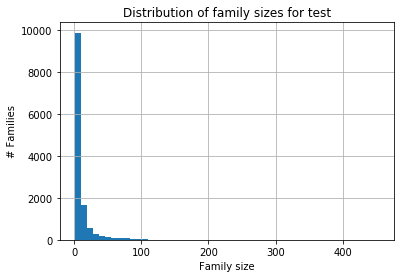

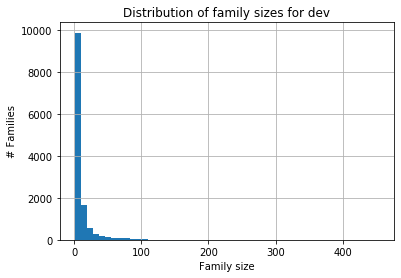

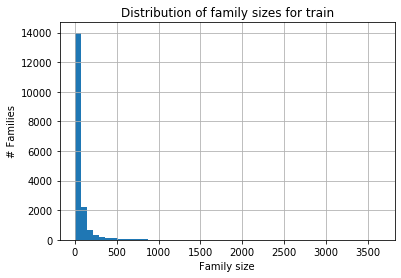

In [19]:
for name, partition in partitions.items():
    partition.groupby('family_id').size().hist(bins=50)
    plt.title('Distribution of family sizes for %s' % name)
    plt.ylabel('# Families')
    plt.xlabel('Family size')
    plt.show()

Text(0, 0.5, 'Number of sequences')

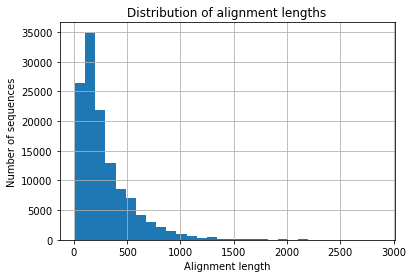

In [8]:
dev['alignment_length'] = dev.aligned_sequence.str.len()
dev.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

In [9]:
family_lengths = (dev[['family_id', 'alignment_length']]
                  .drop_duplicates()
                  .sort_values(by='alignment_length', ascending=False))

family_lengths.head(5)

,family_id,alignment_length
3577,Nup192,2866
1341,CobN-Mg_chel,2394
9434,GREB1,2260
3669,PHO4,2197
3121,Vps35,2026


In [10]:
family_lengths.tail(5)

,family_id,alignment_length
944,Extensin_1,10
6137,Sperm_act_pep,10
1156,Involucrin,10
5508,YLP,9
2952,LSPR,9


In [20]:
dev['alignment_length'].max()

KeyError: 'alignment_length'